# K Means Clustering: Popularity v. Age v. Country Frequency

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

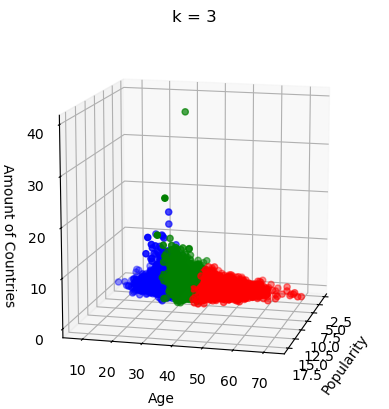

In [8]:
def plot_kmeans(df, clusters):
    """
    generate a 3d plot given sklearn's kmeans implementation, used some code from Tutorial 6 slides
    """
    colormap = {0: 'red', 1: 'green', 2: 'blue', 3: 'pink'}
    
   
    ax = plt.axes(projection="3d")
    ax.scatter(df['Popularity'], 
               df['Age'], 
               df['Amount of Countries'],
               c=[colormap.get(x) for x in clusters.labels_])
    ax.set_box_aspect((6,6,6))
    ax.dist = 15
    ax.elev = 13
    ax.azim = 14
    ax.set_ylabel('Age')
    ax.set_xlabel('Popularity')
    ax.set_zlabel('Amount of Countries')
    ax.set_title(f"k = {len(set(clusters.labels_))}")
    
    plt.show()

books = pd.read_csv("BX-Books-Clean.csv")
features = pd.DataFrame({'Popularity': books['Popularity-Score'], 'Age': books['Median-Age'], 'Amount of Countries': books['Country-Freq']})
clusters = KMeans(n_clusters=3, random_state=2)
clusters.fit(features)

plot_kmeans(features, clusters)

In [9]:
# define cluster centres 
centroids = clusters.cluster_centers_
which_cluster = clusters.labels_

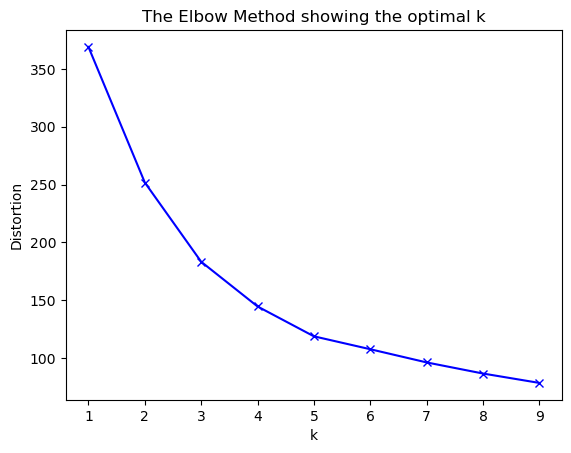

In [10]:
normalized_features = MinMaxScaler().fit_transform(features)
# Code has been taken from Tutorial 6 slides
distortions = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_features)
    distortions.append(kmeans.inertia_)

    
plt.plot(k_range, distortions, 'bx-')

plt.title('The Elbow Method showing the optimal k')
plt.xlabel('k')
plt.ylabel('Distortion')

plt.show()

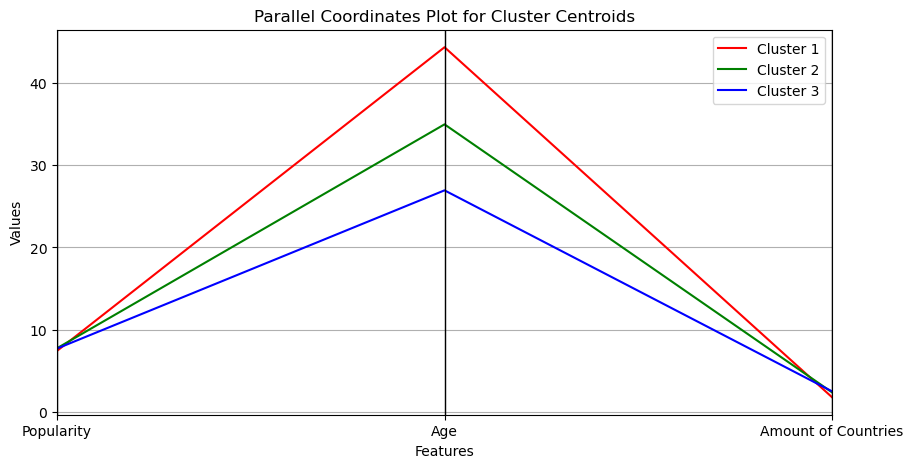

In [11]:
centroids_df = pd.DataFrame(centroids, columns=features.columns)
# Add a column for easier identification
centroids_df['Cluster'] = ['Cluster ' + str(i+1) for i in range(len(centroids))]

# Plot parallel coordinates for centroids
plt.figure(figsize=(10, 5))
parallel_coordinates(centroids_df, 'Cluster', color=['red','green','blue'])
plt.title('Parallel Coordinates Plot for Cluster Centroids')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [13]:
labels = clusters.labels_
squared_distances = np.zeros(features.shape[0])
for i in range(3):
    cluster_points = features[labels == i]
    centroid = centroids[i]
    squared_distances[labels == i] = np.sum((cluster_points - centroid) ** 2, axis=1)

# Calculate the Sum of Squared Distances (SSD)
ssd = np.sum(squared_distances)

# Calculate the average distance of a point from its centroid
average_distance = ssd / features.shape[0]

print("Sum of Squared Distances (SSD):", ssd)
print("Average Distance:", average_distance)

Sum of Squared Distances (SSD): 253629.00664698184
Average Distance: 13.947154613526633


In [14]:
from sklearn.metrics.pairwise import euclidean_distances

# Calculate pairwise distances between centroids
centroid_distances = euclidean_distances(centroids)

# Print the distance matrix between centroids
print("Distance between centroids:")
print(centroid_distances)

Distance between centroids:
[[ 0.          9.39097444 17.40017616]
 [ 9.39097444  0.          8.01749485]
 [17.40017616  8.01749485  0.        ]]
